### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
from itertools import combinations
from collections import Counter
import matplotlib.patheffects as pe

### Daten einlesen

In [2]:
games = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/games2.csv")

In [3]:
champion1 = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/champion1.0.csv")

In [4]:
champion2 = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/champion2.0.csv")

In [5]:
spells = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/Summoner_spell2.csv")

### Visualisierungen
- **Matchdauer / Zeitverlauf**
- **Champions allgemein**
- **Summoner Spells**
- **Objectives & Spielverlauf**
- **Spieleraktivität / Spielaufkommen**

### Matchdauer / Zeitverlauf
- **Verteilung der Matchdauer**
- **Verteilung: Kurze, mittlere und lange Spiele**
- **Anteil der Spiele pro Monat (echte Prozenthöhe)**
- **Siegverteilung: Team 1 vs. Team 2**

In [6]:
games['duration_min'] = games['gameDuration'] / 60

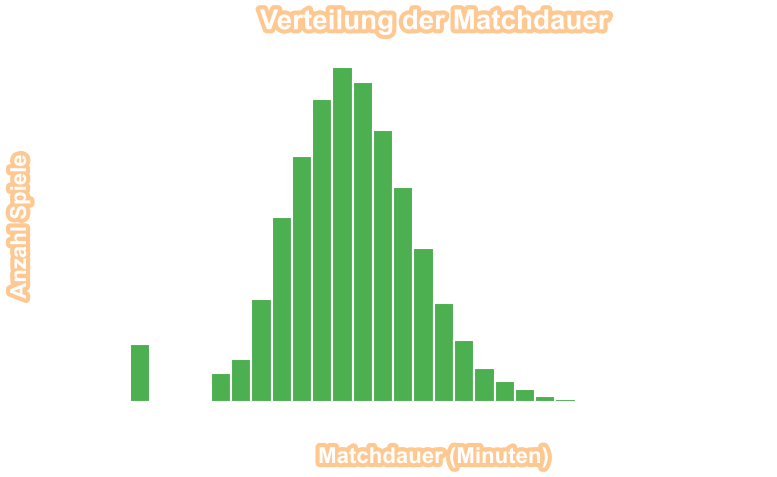

In [7]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

plt.figure(figsize=(8, 5))
plt.hist(games['duration_min'], bins=30, color='#4CAF50', edgecolor='white', linewidth=1.5)

xlabel = plt.xlabel('Matchdauer (Minuten)', fontsize=16, fontweight='bold', color='white', labelpad=12)
xlabel.set_path_effects(glowing())

ylabel = plt.ylabel('Anzahl Spiele', fontsize=16, fontweight='bold', color='white', labelpad=12)
ylabel.set_path_effects(glowing())

title = plt.title('Verteilung der Matchdauer', fontsize=20, fontweight='bold', color='white', pad=15)
title.set_path_effects(glowing())

ax = plt.gca()
ax.tick_params(colors='white')
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)

ax.set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)

plt.tight_layout()
plt.show()


In [8]:
games['game_length'] = pd.cut(
    games['duration_min'],
    bins=[0, 20, 40, games['duration_min'].max()],
    labels=['Kurz (<20 Min)', 'Mittel (20-40 Min)', 'Lang (>=40 Min)']
)

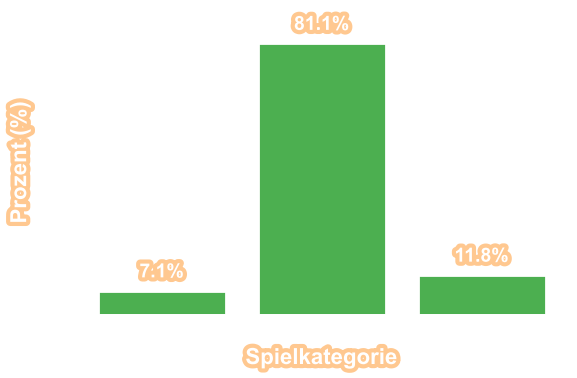

In [9]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

verteilung = games['game_length'].value_counts(normalize=True).sort_index() * 100

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(verteilung.index, verteilung.values, color='#4CAF50', edgecolor='white', linewidth=2)

xlabel = ax.set_xlabel('Spielkategorie', fontsize=16, fontweight='bold', color='white')
xlabel.set_path_effects(glowing())

ylabel = ax.set_ylabel('Prozent (%)', fontsize=16, fontweight='bold', color='white', labelpad=10)
ylabel.set_path_effects(glowing())

offset = max(verteilung.values) * 0.05
for i, value in enumerate(verteilung.values):
    t = ax.text(i, value + offset, f"{value:.1f}%", ha='center', fontsize=14, fontweight='bold', color='white')
    t.set_path_effects(glowing())

ax.set_xticks(range(len(verteilung.index)))
ax.set_xticklabels(verteilung.index, color='white', fontweight='bold')
ax.tick_params(colors='white')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_ylim(0, max(verteilung.values) + 10)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()


In [10]:
games['creationTime_dt'] = pd.to_datetime(games['creationTime_dt'])
games['month'] = games['creationTime_dt'].dt.month

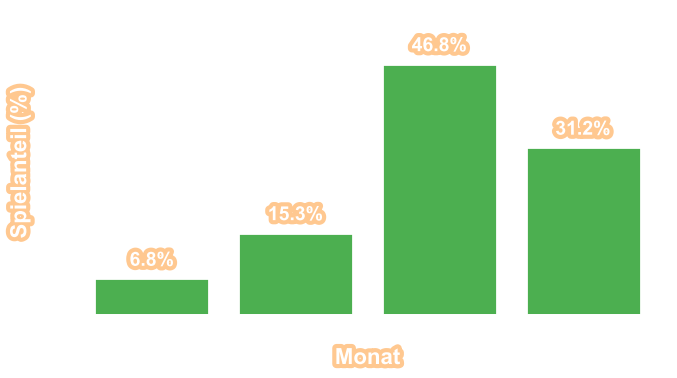

In [11]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

spiele_pro_monat = games['month'].value_counts().sort_index()
gesamtanzahl = len(games)
prozent = spiele_pro_monat / gesamtanzahl * 100

fig, ax = plt.subplots(figsize=(7, 4))

x_pos = range(len(spiele_pro_monat))
bars = ax.bar(
    x_pos,
    prozent.values,
    color='#4CAF50',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Monat', fontsize=16, fontweight='bold', color='white')
xlabel.set_path_effects(glowing())

ylabel = ax.set_ylabel('Spielanteil (%)', fontsize=16, fontweight='bold', color='white')
ylabel.set_path_effects(glowing())

offset = prozent.max() * 0.05
for i, pct in enumerate(prozent.values):
    t = ax.text(i, pct + offset, f"{pct:.1f}%", ha='center', fontweight='bold', fontsize=14, color='white')
    t.set_path_effects(glowing())

ax.set_xticks(x_pos)
ax.set_xticklabels(spiele_pro_monat.index.astype(str), color='white', fontweight='bold')

ax.tick_params(colors='white')
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_ylim(0, prozent.max() + 10)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()



In [12]:
siege = games['winner'].value_counts(normalize=True) * 100
siege = siege.sort_index()
siege.index = ['Team 1', 'Team 2']

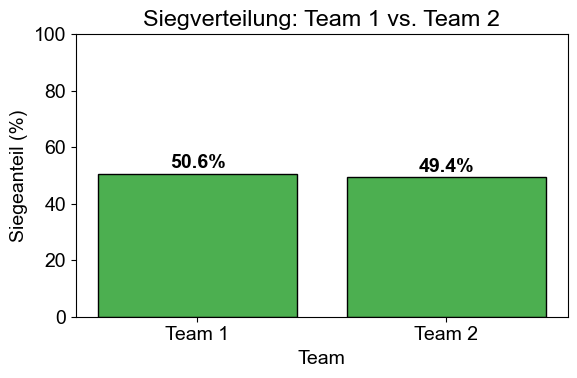

In [13]:
siege = games['winner'].value_counts(normalize=True) * 100
siege = siege.sort_index()
siege.index = ['Team 1', 'Team 2']

plt.figure(figsize=(6, 4))
bars = plt.bar(siege.index, siege.values,
               color='#4CAF50', edgecolor='black')
plt.title('Siegverteilung: Team 1 vs. Team 2')
plt.xlabel('Team')
plt.ylabel('Siegeanteil (%)')
plt.ylim(0, 100)

for i, value in enumerate(siege.values):
    plt.text(i, value + 2, f"{value:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

### Champions allgemein
- **Top 5 meistgespielte Champions**
- **Siegquote der Top 5 meistgespielten Champions**
- **Pickrate vs. Banrate (Top 10 Champions)**
- **Top 10 Champion-Duos im selben Team**

In [14]:
champion_spalten = [
    't1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id'
]
alle_champions = pd.concat([games[spalte] for spalte in champion_spalten])

top5 = alle_champions.value_counts().head(5).reset_index()
top5.columns = ['champion_id', 'Anzahl']

gesamt = alle_champions.shape[0]
top5['Prozent'] = (top5['Anzahl'] / gesamt) * 100

champion1['id'] = champion1['id'].astype(int)
top5 = top5.merge(champion1[['id', 'name']], left_on='champion_id', right_on='id', how='left')

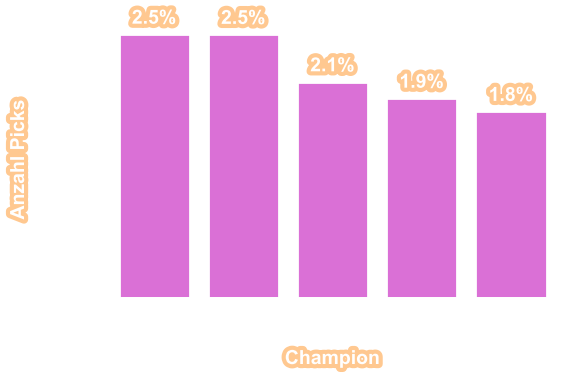

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

# Plot
fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.bar(
    top5['name'],
    top5['Anzahl'],
    color='orchid',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Champion', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anzahl Picks', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for i, (anzahl, prozent) in enumerate(zip(top5['Anzahl'], top5['Prozent'])):
    text = ax.text(i, anzahl + 500, f"{prozent:.1f}%", 
                   ha='center', fontsize=14, fontweight='bold', color='white')
    text.set_path_effects(gloweffect())

ax.set_xticks(range(len(top5)))
ax.set_xticklabels(top5['name'], rotation=15, color='white', fontweight='bold')
ax.tick_params(colors='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

In [16]:
champions_teams = []

for team, winner_col in [('t1', 1), ('t2', 0)]:
    for i in range(1, 6):
        champions_teams.append(pd.DataFrame({
            'championId': games[f'{team}_champ{i}id'],
            'winner': (games['winner'] == winner_col).astype(int)
        }))

champion_data = pd.concat(champions_teams)

In [17]:
top5 = champion_data['championId'].value_counts().head(5).reset_index()
top5.columns = ['championId', 'Anzahl']

champion_data_top5 = champion_data[champion_data['championId'].isin(top5['championId'])]

win_stats = champion_data_top5.groupby('championId')['winner'].agg(['sum', 'count']).reset_index()
win_stats['Winrate'] = win_stats['sum'] / win_stats['count'] * 100

In [18]:
champion_df = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/champion1.0.csv") 
champion_df['id'] = pd.to_numeric(champion_df['id'], errors='coerce').astype('Int64')
win_stats['championId'] = pd.to_numeric(win_stats['championId'], errors='coerce').astype('Int64')
win_stats = win_stats.merge(champion_df[['id', 'name']], left_on='championId', right_on='id', how='left')
win_stats.drop(columns='id', inplace=True, errors='ignore')

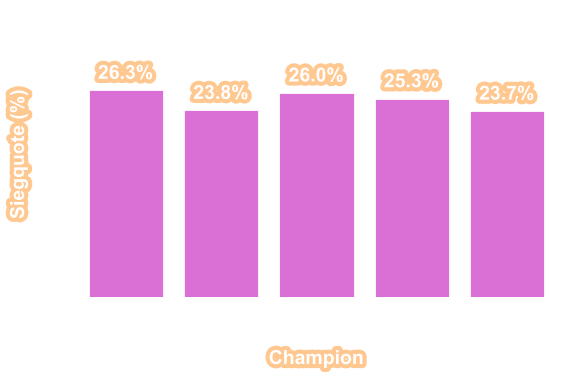

In [19]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.bar(
    win_stats['name'],
    win_stats['Winrate'],
    color='orchid',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Champion', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(glowing())

ylabel = ax.set_ylabel('Siegquote (%)', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(glowing())

offset = win_stats['Winrate'].max() * 0.05
for i, winrate in enumerate(win_stats['Winrate']):
    text = ax.text(i, winrate + offset, f"{winrate:.1f}%", ha='center',
                   fontsize=14, fontweight='bold', color='white')
    text.set_path_effects(glowing())

ax.set_xticks(range(len(win_stats)))
ax.set_xticklabels(win_stats['name'], rotation=15, color='white', fontweight='bold')
ax.tick_params(colors='white')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_ylim(0, win_stats['Winrate'].max() + 10)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()


In [20]:
champion_spalten = [
    't1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id'
]
alle_picks = pd.concat([games[spalte] for spalte in champion_spalten])

pickrate = alle_picks.value_counts(normalize=True).mul(100).reset_index()
pickrate.columns = ['championId', 'Pickrate']

In [21]:
ban_spalten = ['t1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5',
               't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']
alle_bans = pd.concat([games[spalte] for spalte in ban_spalten])
alle_bans = alle_bans[alle_bans != -1]

banrate = alle_bans.value_counts(normalize=True).mul(100).reset_index()
banrate.columns = ['championId', 'Banrate']

In [22]:
pickban = pd.merge(pickrate, banrate, on='championId', how='outer').fillna(0)
champion1['id'] = champion1['id'].astype(int)
pickban = pickban.merge(champion1[['id', 'name']], left_on='championId', right_on='id', how='left')
pickban['gesamt'] = pickban['Pickrate'] + pickban['Banrate']
top10 = pickban.sort_values('gesamt', ascending=False).head(10)

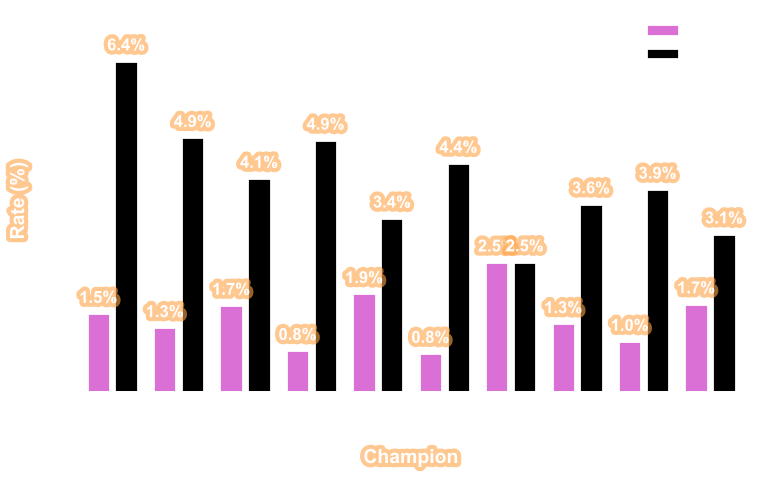

In [23]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

x = np.arange(len(top10))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

bar1 = ax.bar(
    x - width * 0.6,
    top10['Pickrate'],
    width,
    label='Pickrate',
    color='orchid',
    edgecolor='white',
    linewidth=2
)

bar2 = ax.bar(
    x + width * 0.6,
    top10['Banrate'],
    width,
    label='Banrate',
    color='black',
    edgecolor='white',
    linewidth=2
)

ax.set_xticks(x)
ax.set_xticklabels(top10['name'], rotation=15, color='white', fontweight='bold')

xlabel = ax.set_xlabel('Champion', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Rate (%)', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())


for i in range(len(top10)):
    t1 = ax.text(
        x[i] - width * 0.6,
        top10['Pickrate'].iloc[i] + 0.2,
        f"{top10['Pickrate'].iloc[i]:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t1.set_path_effects(gloweffect())

    t2 = ax.text(
        x[i] + width * 0.6,
        top10['Banrate'].iloc[i] + 0.2,
        f"{top10['Banrate'].iloc[i]:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t2.set_path_effects(gloweffect())

ax.tick_params(colors='white')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

obergrenze = max(top10['Pickrate'].max(), top10['Banrate'].max()) + 1
ax.set_ylim(0, obergrenze)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.legend(facecolor='none', edgecolor='white', fontsize=12, labelcolor='white')

plt.tight_layout()
plt.show()


In [24]:
champion_namen = dict(zip(champion1['id'], champion1['name']))

In [25]:
teams = []

for i in range(len(games)):
    t1 = sorted([games.at[i, f't1_champ{j}id'] for j in range(1, 6)])
    t2 = sorted([games.at[i, f't2_champ{j}id'] for j in range(1, 6)])
    teams.append(t1)
    teams.append(t2)

kombis_2er = []

for team in teams:
    kombis_2er.extend(combinations(team, 2))

counter_2er = Counter(kombis_2er)
top10_2er = counter_2er.most_common(10)

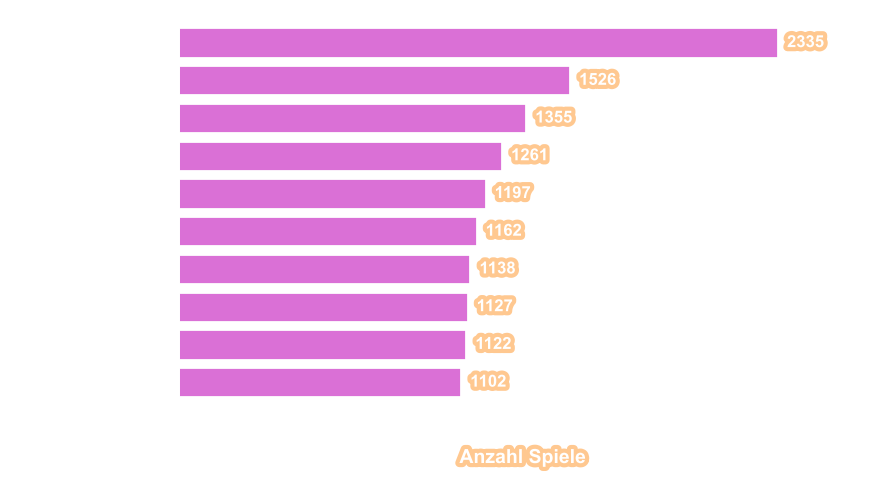

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

kombis_labels = [f"{champion_namen.get(a)} + {champion_namen.get(b)}" for (a, b), _ in top10_2er]
werte = [anzahl for _, anzahl in top10_2er]

fig, ax = plt.subplots(figsize=(9, 5))

bars = ax.barh(
    kombis_labels,
    werte,
    color='orchid',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Anzahl Spiele', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

for i, value in enumerate(werte):
    t = ax.text(
        value + max(werte) * 0.015,
        i,
        str(value),
        va='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_xlim(0, max(werte) * 1.15)
ax.invert_yaxis()
ax.tick_params(colors='white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


### Summoner Spells
- **Verteilung der Summoner Spells (gesamt)**
- **Top 10 Summoner Spell-Kombinationen**
- **Siegquote der Top 10 Spell-Kombinationen**

In [27]:
spell_spalten = [
    't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2',
    't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4_sum1', 't1_champ4_sum2',
    't1_champ5_sum1', 't1_champ5_sum2',
    't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2',
    't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4_sum1', 't2_champ4_sum2',
    't2_champ5_sum1', 't2_champ5_sum2'
]
alle_spells = pd.concat([games[spalte] for spalte in spell_spalten])

In [28]:
spells = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/Summoner_spell2.csv")
alle_spells_df = pd.DataFrame({'spell_id': alle_spells})
spells['id'] = spells['id'].astype(int)
alle_spells_df = alle_spells_df.merge(spells[['id', 'name']], left_on='spell_id', right_on='id', how='left')

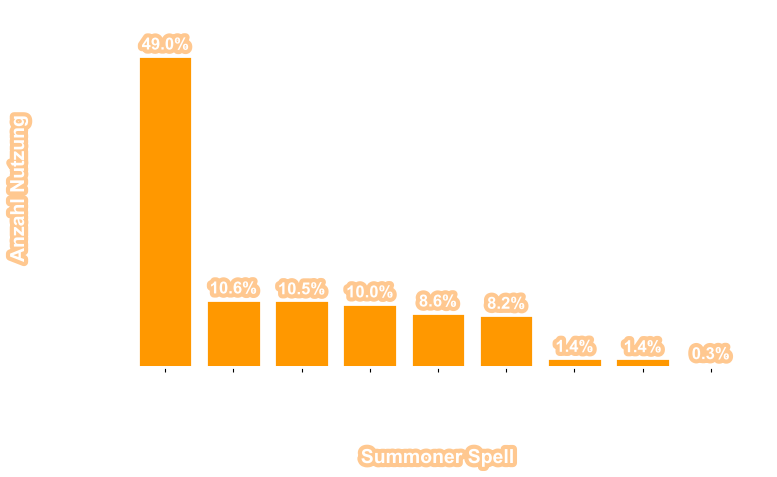

In [29]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

spell_counts = alle_spells_df['name'].value_counts(ascending=False)
gesamt = spell_counts.sum()
spell_prozent = (spell_counts / gesamt) * 100

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    spell_counts.index,
    spell_counts.values,
    color='#FF9800',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Summoner Spell', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anzahl Nutzung', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for i, (anzahl, prozent) in enumerate(zip(spell_counts.values, spell_prozent.values)):
    t = ax.text(
        i,
        anzahl + spell_counts.max() * 0.02,
        f"{prozent:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_xticks(range(len(spell_counts.index)))
ax.set_xticklabels(spell_counts.index, rotation=45, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_ylim(0, spell_counts.max() * 1.15)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


In [30]:
kombis = []

for i in range(1, 6):
    kombis.append(games[[f't1_champ{i}_sum1', f't1_champ{i}_sum2']])
    kombis.append(games[[f't2_champ{i}_sum1', f't2_champ{i}_sum2']])
kombis_df = pd.concat(kombis)
kombis_df['min'] = kombis_df.min(axis=1)
kombis_df['max'] = kombis_df.max(axis=1)
kombis_df['combo_id'] = kombis_df['min'].astype(str) + '_' + kombis_df['max'].astype(str)

In [31]:
spell_id_to_name = spells.set_index('id')['name'].to_dict()
kombis_df['name_min'] = kombis_df['min'].map(spell_id_to_name)
kombis_df['name_max'] = kombis_df['max'].map(spell_id_to_name)
kombis_df['combo_name'] = kombis_df['name_min'] + ' + ' + kombis_df['name_max']

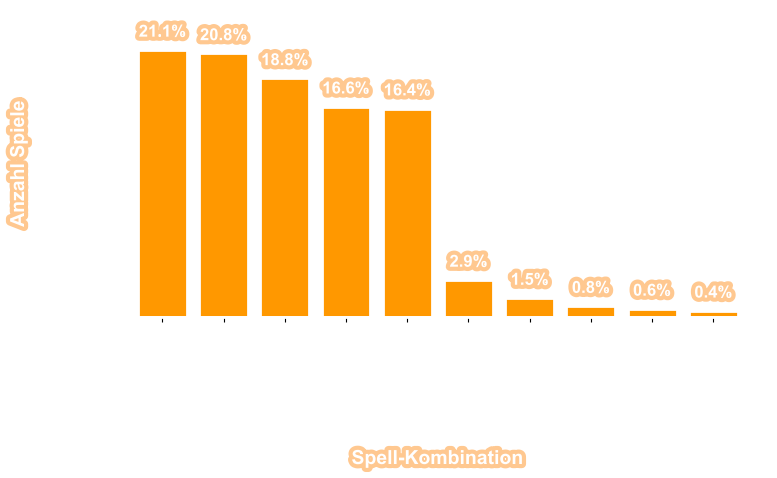

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

top10 = kombis_df['combo_name'].value_counts().head(10)
gesamt = top10.sum()
prozent = (top10 / gesamt) * 100

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    top10.index,
    top10.values,
    color='#FF9800',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Spell-Kombination', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anzahl Spiele', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for i, (anzahl, pct) in enumerate(zip(top10.values, prozent.values)):
    t = ax.text(
        i,
        anzahl + top10.max() * 0.05,
        f"{pct:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_xticks(range(len(top10.index)))
ax.set_xticklabels(top10.index, rotation=45, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_ylim(0, top10.max() * 1.15)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()



In [33]:
kombis_mit_winner = []

for i in range(1, 6):
    df_t1 = games[[f't1_champ{i}_sum1', f't1_champ{i}_sum2', 'winner']].copy()
    df_t1['team'] = 1
    df_t1['won'] = (df_t1['winner'] == 1).astype(int)
    df_t1.columns = ['sum1', 'sum2', 'winner', 'team', 'won']

    df_t2 = games[[f't2_champ{i}_sum1', f't2_champ{i}_sum2', 'winner']].copy()
    df_t2['team'] = 2
    df_t2['won'] = (df_t2['winner'] == 0).astype(int)
    df_t2.columns = ['sum1', 'sum2', 'winner', 'team', 'won']

    kombis_mit_winner.append(df_t1)
    kombis_mit_winner.append(df_t2)
kombis_df = pd.concat(kombis_mit_winner)

In [34]:
kombis_df['min'] = kombis_df[['sum1', 'sum2']].min(axis=1)
kombis_df['max'] = kombis_df[['sum1', 'sum2']].max(axis=1)
kombis_df['combo_id'] = kombis_df['min'].astype(str) + '_' + kombis_df['max'].astype(str)
id_to_name = dict(zip(spells['id'], spells['name']))
kombis_df['combo_name'] = kombis_df['min'].map(id_to_name) + ' + ' + kombis_df['max'].map(id_to_name)

In [35]:
stats = kombis_df.groupby(['combo_id', 'combo_name'])['won'].agg(['count', 'sum']).reset_index()
stats['winrate'] = stats['sum'] / stats['count'] * 100
stats = stats.sort_values('count', ascending=False).head(10).reset_index(drop=True)

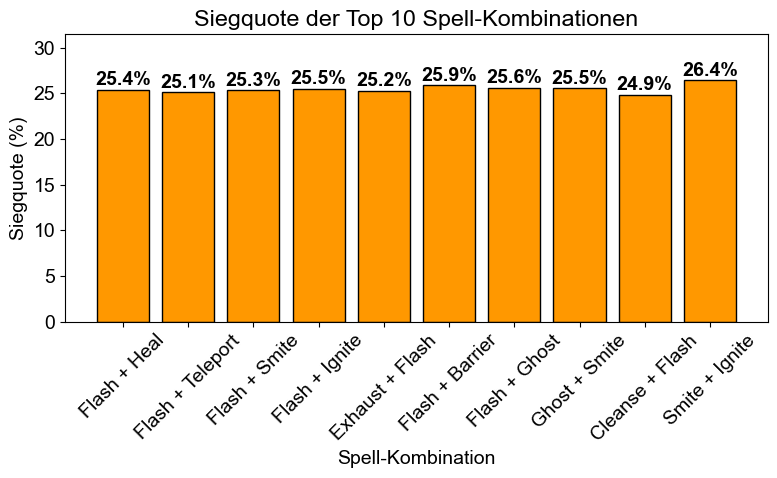

In [36]:
plt.figure(figsize=(8, 5))
bars = plt.bar(stats['combo_name'], stats['winrate'],
               color='#FF9800', edgecolor='black')
plt.xlabel('Spell-Kombination')
plt.ylabel('Siegquote (%)')
plt.title('Siegquote der Top 10 Spell-Kombinationen')
plt.xticks(rotation=45)
plt.ylim(0, stats['winrate'].max() + 5)

for i, winrate in enumerate(stats['winrate']):
    plt.text(i, winrate + 0.5, f"{winrate:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

### Objectives & Spielverlauf
- **Gesammelte Drachen pro Team (gesamt)**
- **Siegquote mit mehr Drachen (Team 1 vs. Team 2)**
- **Herald im Spiel: Ja oder Nein**
- **Siegquote mit/ohne Rift Herald**
- **Häufigkeit: First Objectives im Spiel**
- **Siegquote bei First Objectives**
- **Gesammelte Baron-Kills pro Team (gesamt)**
- **Wie oft hat ein Team mit Baron gewonnen?**
- **Einfluss von First Tower auf Spielsieg**

In [37]:
drakes = games[['t1_dragonKills', 't2_dragonKills']]

In [38]:
total_drakes = pd.Series({
    'Team 1': drakes['t1_dragonKills'].sum(),
    'Team 2': drakes['t2_dragonKills'].sum()
})

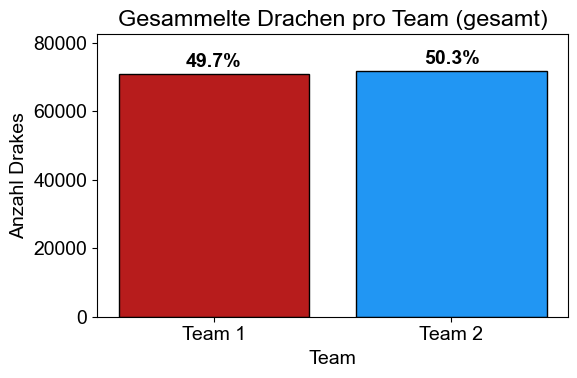

In [39]:
plt.figure(figsize=(6, 4))
bars = plt.bar(total_drakes.index, total_drakes.values,
               color=['#B71C1C', '#2196F3'],
               edgecolor='black')
plt.xlabel('Team')
plt.ylabel('Anzahl Drakes')
plt.title('Gesammelte Drachen pro Team (gesamt)')
plt.xticks(rotation=0)

gesamt = total_drakes.sum()
prozente = [(v / gesamt) * 100 for v in total_drakes.values]

plt.ylim(0, total_drakes.max() * 1.15)

for i, (wert, pct) in enumerate(zip(total_drakes.values, prozente)):
    plt.text(i, wert + total_drakes.max()*0.03, f"{pct:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [40]:
t1_gewinnt = 0
t2_gewinnt = 0
gleichstand = 0

In [41]:
for i in range(len(games)):
    t1_dragons = games.at[i, 't1_dragonKills']
    t2_dragons = games.at[i, 't2_dragonKills']
    winner = games.at[i, 'winner']

    if t1_dragons > t2_dragons and winner == 1:
        t1_gewinnt += 1
    elif t2_dragons > t1_dragons and winner == 2:
        t2_gewinnt += 1
    elif t1_dragons == t2_dragons:
        gleichstand += 1

In [42]:
gesamt = t1_gewinnt + t2_gewinnt + gleichstand
werte = [t1_gewinnt / gesamt * 100, t2_gewinnt / gesamt * 100, gleichstand / gesamt * 100]
labels = ['Team 1\n(mit mehr Drachen)', 'Team 2\n(mit mehr Drachen)', 'Gleichstand']
farben = ['green', 'blue', 'gray']

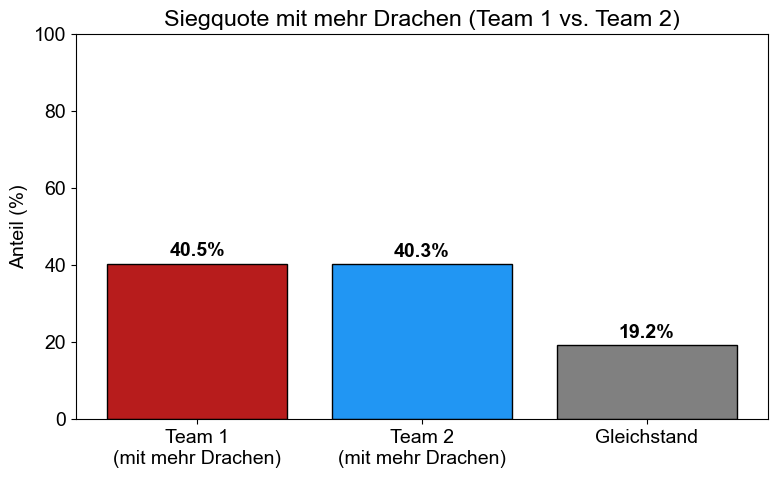

In [43]:
farben = ['#B71C1C', '#2196F3', 'gray']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, werte, color=farben, edgecolor='black')
plt.title('Siegquote mit mehr Drachen (Team 1 vs. Team 2)')
plt.ylabel('Anteil (%)')
plt.ylim(0, 100)

for i, value in enumerate(werte):
    plt.text(i, value + 2, f"{value:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [44]:
games['herald_total'] = games['t1_riftHeraldKills'] + games['t2_riftHeraldKills']
herald_counts = games['herald_total'].value_counts().sort_index()
games['herald_gemacht'] = games['herald_total'] > 0 

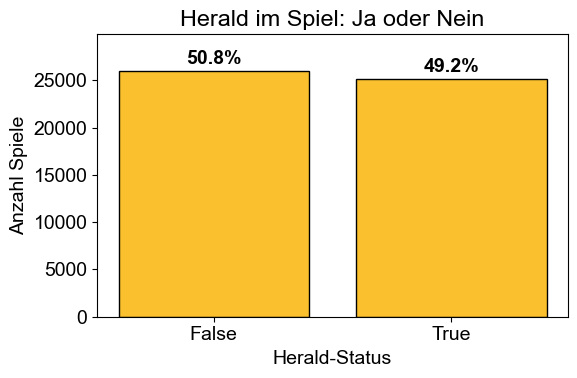

In [45]:
herald_status_counts = games['herald_gemacht'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(herald_status_counts.index, herald_status_counts.values,
               color='#FBC02D', edgecolor='black')
plt.xlabel('Herald-Status')
plt.ylabel('Anzahl Spiele')
plt.title('Herald im Spiel: Ja oder Nein')
plt.xticks(range(len(herald_status_counts.index)), herald_status_counts.index, rotation=0)

gesamt = herald_status_counts.sum()
prozente = [(v / gesamt) * 100 for v in herald_status_counts.values]
plt.ylim(0, herald_status_counts.max() * 1.15)

for i, (wert, pct) in enumerate(zip(herald_status_counts.values, prozente)):
    plt.text(i, wert + herald_status_counts.max() * 0.03, f"{pct:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [46]:
herald_ja_gewonnen = 0
herald_nein_gewonnen = 0

In [47]:
for i in range(len(games)):
    herald = games.at[i, 'firstRiftHerald']
    winner = games.at[i, 'winner']

    if (herald == 1 and winner == 1) or (herald == 2 and winner == 2):
        herald_ja_gewonnen += 1
    elif herald == 0:
        herald_nein_gewonnen += 1

In [48]:
gesamt = herald_ja_gewonnen + herald_nein_gewonnen
werte = [herald_ja_gewonnen / gesamt * 100, herald_nein_gewonnen / gesamt * 100]
labels = ['Herald gemacht', 'Herald nicht gemacht']
farben = ['green', 'gray']

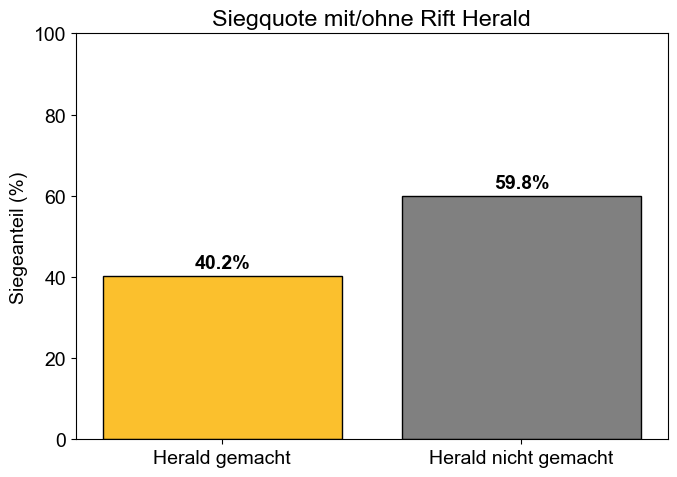

In [49]:
farben = ['#FBC02D', 'gray']

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, werte, color=farben, edgecolor='black')
plt.title('Siegquote mit/ohne Rift Herald')
plt.ylabel('Siegeanteil (%)')
plt.ylim(0, 100)

for i, value in enumerate(werte):
    plt.text(i, value + 2, f"{value:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [50]:
first_objectives = ['firstBlood', 'firstTower', 'firstDragon', 'firstRiftHerald', 'firstBaron']
häufigkeiten = {}

for obj in first_objectives:
    anteil = (games[obj] != 0).mean() * 100
    häufigkeiten[obj] = anteil

In [51]:
label_map = {
    'firstBlood': 'First Blood',
    'firstTower': 'First Tower',
    'firstDragon': 'First Dragon',
    'firstRiftHerald': 'First Herald',
    'firstBaron': 'First Baron'
}
labels = [label_map[k] for k in häufigkeiten.keys()]
werte = [häufigkeiten[k] for k in häufigkeiten.keys()]

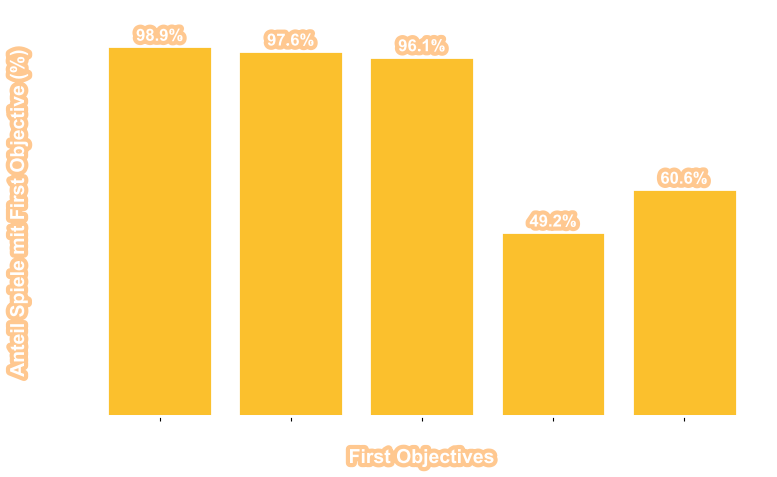

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    labels,
    werte,
    color='#FBC02D',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('First Objectives', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anteil Spiele mit First Objective (%)', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for i, value in enumerate(werte):
    t = ax.text(
        i,
        value + 1.5,
        f"{value:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_ylim(0, max(werte) + 10)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


In [53]:
siegquoten = {}

for objektiv in ['firstBlood', 'firstTower', 'firstDragon', 'firstRiftHerald', 'firstBaron']:
    total = len(games)
    stimmen = (games[objektiv] == games['winner']).sum()
    prozent = stimmen / total * 100
    siegquoten[objektiv] = prozent

In [54]:
label_namen = {
    'firstBlood': 'First Blood',
    'firstTower': 'First Tower',
    'firstDragon': 'First Dragon',
    'firstRiftHerald': 'First Herald',
    'firstBaron': 'First Baron'
}

labels = [label_namen[key] for key in siegquoten]
werte = [siegquoten[key] for key in siegquoten]

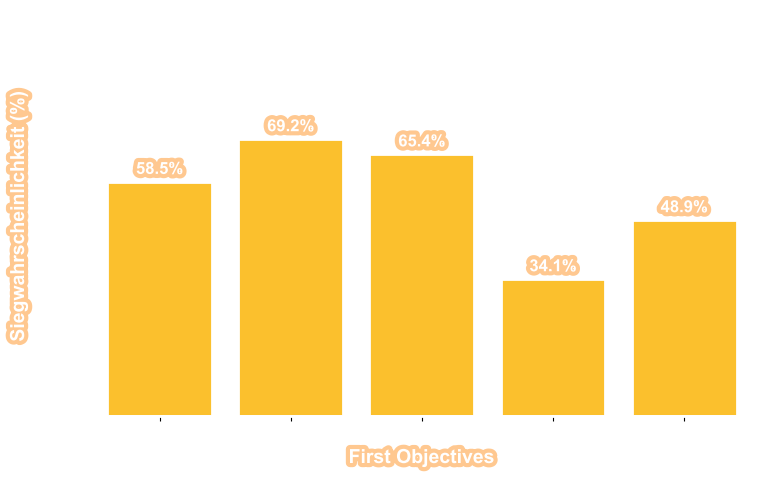

In [55]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    labels,
    werte,
    color='#FBC02D',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('First Objectives', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Siegwahrscheinlichkeit (%)', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for i, wert in enumerate(werte):
    t = ax.text(
        i,
        wert + 2,
        f"{wert:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_ylim(0, 100)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


In [56]:
barons = games[['t1_baronKills', 't2_baronKills']]

In [57]:
total_barons = pd.Series({
    'Team 1': barons['t1_baronKills'].sum(),
    'Team 2': barons['t2_baronKills'].sum()
})

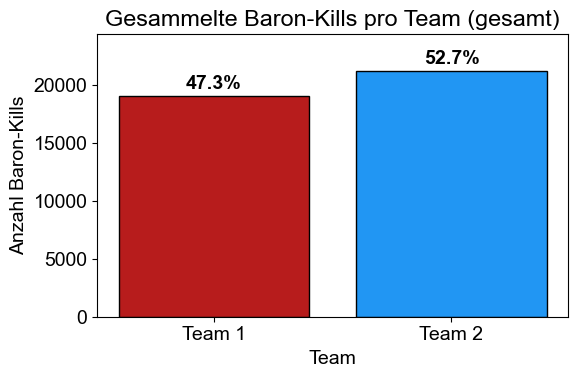

In [58]:
farben = ['#B71C1C', '#2196F3']

plt.figure(figsize=(6, 4))
bars = plt.bar(total_barons.index, total_barons.values,
               color=farben, edgecolor='black')
plt.xlabel('Team')
plt.ylabel('Anzahl Baron-Kills')
plt.title('Gesammelte Baron-Kills pro Team (gesamt)')
plt.xticks(rotation=0)
gesamt = total_barons.sum()
prozente = [(v / gesamt) * 100 for v in total_barons.values]

plt.ylim(0, total_barons.max() * 1.15)

for i, (wert, pct) in enumerate(zip(total_barons.values, prozente)):
    plt.text(i, wert + total_barons.max()*0.03, f"{pct:.1f}%",
             ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [59]:
t1_baron_win = games[(games['t1_baronKills'] > 0) & (games['winner'] == 1)]
t2_baron_win = games[(games['t2_baronKills'] > 0) & (games['winner'] == 2)]

In [60]:
t1_baron_total = games[games['t1_baronKills'] > 0]
t2_baron_total = games[games['t2_baronKills'] > 0]

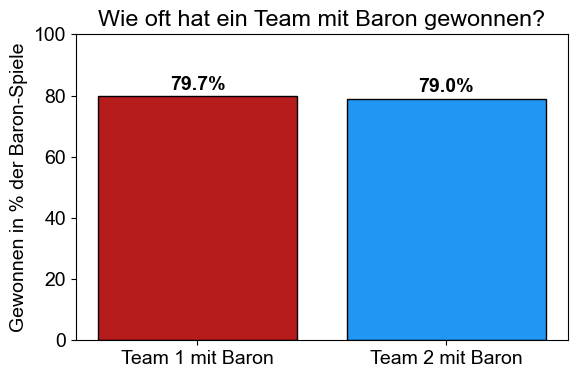

In [61]:
farben = ['#B71C1C', '#2196F3']

gewinnrate = [
    len(t1_baron_win) / len(t1_baron_total) * 100,
    len(t2_baron_win) / len(t2_baron_total) * 100
]

plt.figure(figsize=(6,4))
bars = plt.bar(['Team 1 mit Baron', 'Team 2 mit Baron'], gewinnrate,
               color=farben, edgecolor='black')
plt.title('Wie oft hat ein Team mit Baron gewonnen?')
plt.ylabel('Gewonnen in % der Baron-Spiele')
plt.ylim(0, 100)

for i, pct in enumerate(gewinnrate):
    plt.text(i, pct + 2, f"{pct:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [62]:
first_tower_gewonnen = (games['firstTower'] == games['winner']).astype(int)

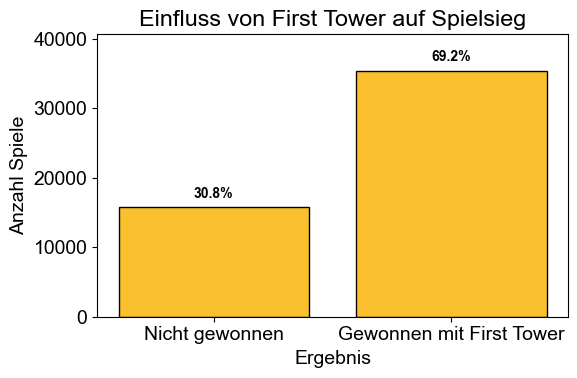

In [63]:
counts = first_tower_gewonnen.value_counts().sort_index()
labels = ['Nicht gewonnen', 'Gewonnen mit First Tower']

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color='#FBC02D', edgecolor='black')
plt.xlabel('Ergebnis')
plt.ylabel('Anzahl Spiele')
plt.title('Einfluss von First Tower auf Spielsieg')
plt.xticks(rotation=0)

gesamt = counts.sum()
for i, value in enumerate(counts):
    prozent = value / gesamt * 100
    plt.text(i, value + counts.max() * 0.04, f"{prozent:.1f}%",
             ha='center', fontweight='bold', color='black', fontsize=10)
plt.ylim(0, counts.max() * 1.15)
plt.tight_layout()
plt.show()

### Spieleraktivität / Spielaufkommen
- **Spielaufkommen pro Monat**
- **Spieleaufkommen pro Tag – Juli 2017**
- **Spieleaufkommen pro Tag – August 2017**
- **Spielaufkommen nach Wochentag**

In [64]:
games['month'] = games['creationTime_dt'].dt.to_period('M')

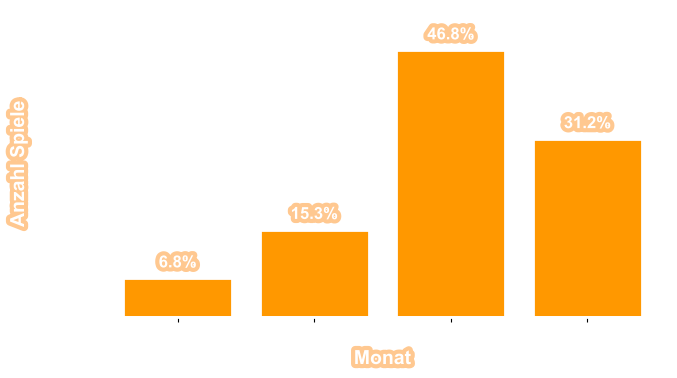

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

spiele_pro_monat = games['month'].value_counts().sort_index()
gesamt = spiele_pro_monat.sum()

fig, ax = plt.subplots(figsize=(7, 4))

bars = ax.bar(
    spiele_pro_monat.index.astype(str),
    spiele_pro_monat.values,
    color='#FF9800',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Monat', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anzahl Spiele', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for i, value in enumerate(spiele_pro_monat):
    prozent = value / gesamt * 100
    t = ax.text(
        i,
        value + spiele_pro_monat.max() * 0.04,
        f"{prozent:.1f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_xticks(range(len(spiele_pro_monat.index)))
ax.set_xticklabels(spiele_pro_monat.index.astype(str), rotation=0, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_ylim(0, spiele_pro_monat.max() * 1.15)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


# von 8.6 bis 30.6.2017 von 1.7 bis 31.7.2017 von 1.8. bis.31.8.2017 von 1.9 bis 6.9.2017
# also  monat 6 sind vollständig sowie monat 9 auch nicht vollständig

In [66]:
games['creationTime_dt'] = pd.to_datetime(games['creationTime_dt'], errors='coerce')

juli = games[
    (games['creationTime_dt'].dt.year == 2017) &
    (games['creationTime_dt'].dt.month == 7)
]
spiele_pro_tag = juli['creationTime_dt'].dt.day.value_counts().sort_index()
prozentwerte = (spiele_pro_tag / spiele_pro_tag.sum()) * 100

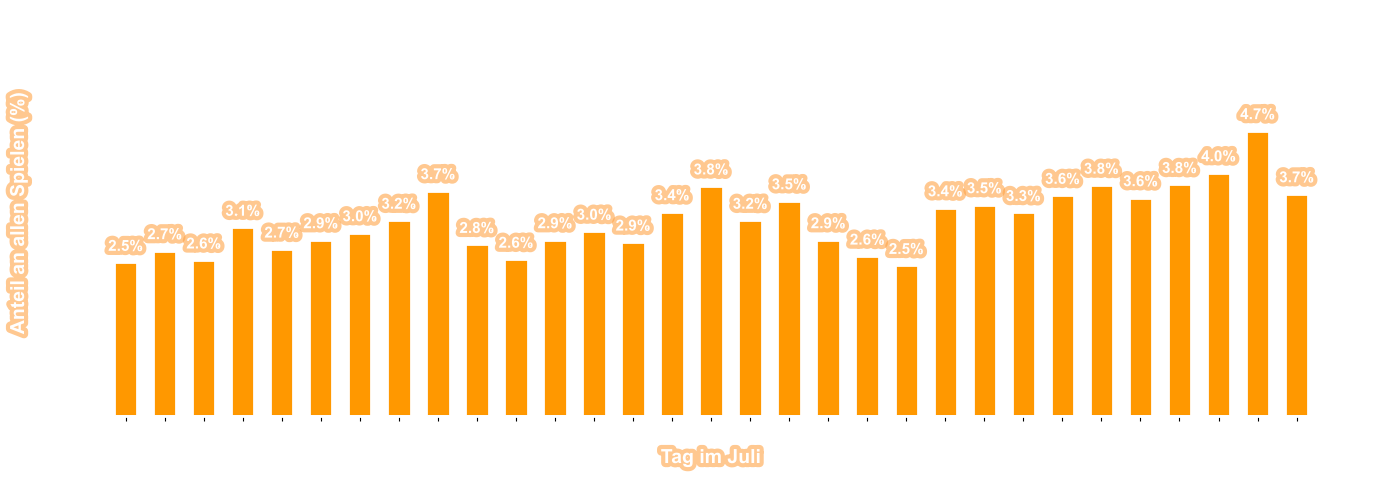

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

juli = games[
    (games['creationTime_dt'].dt.year == 2017) &
    (games['creationTime_dt'].dt.month == 7)
]

spiele_pro_tag = juli['creationTime_dt'].dt.day.value_counts().sort_index()
prozentwerte = (spiele_pro_tag / spiele_pro_tag.sum()) * 100

fig, ax = plt.subplots(figsize=(14, 5))

bars = ax.bar(
    spiele_pro_tag.index,
    prozentwerte,
    width=0.6,
    color='#FF9800',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Tag im Juli', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anteil an allen Spielen (%)', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for tag, wert in zip(spiele_pro_tag.index, prozentwerte):
    t = ax.text(
        tag,
        wert + prozentwerte.max() * 0.04,
        f"{wert:.1f}%",
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_xticks(spiele_pro_tag.index)
ax.set_xticklabels(spiele_pro_tag.index, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0, prozentwerte.max() + 2)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


In [68]:
august = games[
    (games['creationTime_dt'].dt.year == 2017) &
    (games['creationTime_dt'].dt.month == 8)
]

spiele_pro_tag_aug = august['creationTime_dt'].dt.day.value_counts().sort_index()
prozentwerte_aug = (spiele_pro_tag_aug / spiele_pro_tag_aug.sum()) * 100

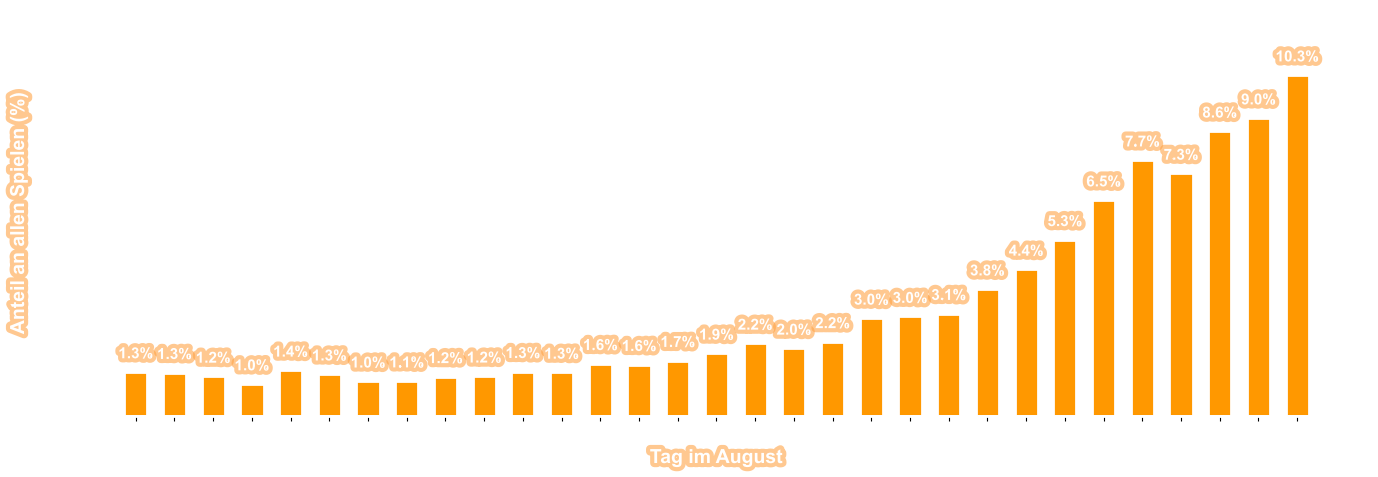

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def gloweffect():
    return [pe.Stroke(linewidth=6, foreground='#FFA447', alpha=0.6), pe.Normal()]

august = games[
    (games['creationTime_dt'].dt.year == 2017) &
    (games['creationTime_dt'].dt.month == 8)
]

spiele_pro_tag_aug = august['creationTime_dt'].dt.day.value_counts().sort_index()
prozentwerte_aug = (spiele_pro_tag_aug / spiele_pro_tag_aug.sum()) * 100

fig, ax = plt.subplots(figsize=(14, 5))

bars = ax.bar(
    spiele_pro_tag_aug.index,
    prozentwerte_aug,
    width=0.6,
    color='#FF9800',
    edgecolor='white',
    linewidth=2
)

xlabel = ax.set_xlabel('Tag im August', fontsize=14, fontweight='bold', color='white')
xlabel.set_path_effects(gloweffect())

ylabel = ax.set_ylabel('Anteil an allen Spielen (%)', fontsize=14, fontweight='bold', color='white')
ylabel.set_path_effects(gloweffect())

for tag, wert in zip(spiele_pro_tag_aug.index, prozentwerte_aug):
    t = ax.text(
        tag,
        wert + prozentwerte_aug.max() * 0.04,
        f"{wert:.1f}%",
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='white'
    )
    t.set_path_effects(gloweffect())

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_xticks(spiele_pro_tag_aug.index)
ax.set_xticklabels(spiele_pro_tag_aug.index, color='white', fontweight='bold')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0, prozentwerte_aug.max() + 2)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

plt.tight_layout()
plt.show()


In [70]:
games['weekday'] = games['creationTime_dt'].dt.dayofweek

In [71]:
spiele_wochentag = games['weekday'].value_counts().sort_index()
wochentage = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
spiele_wochentag.index = wochentage

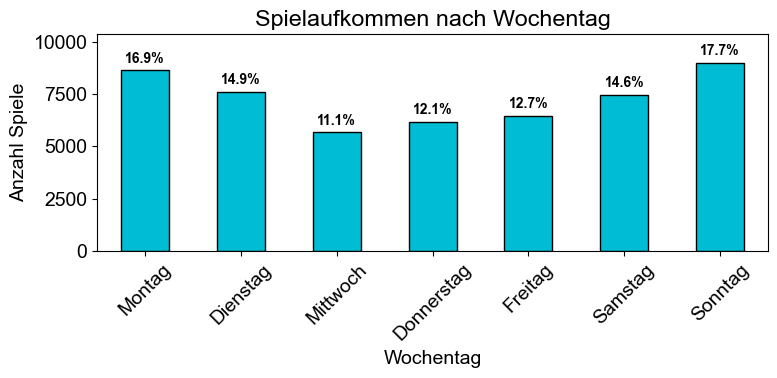

In [72]:
plt.figure(figsize=(8, 4))
spiele_wochentag.plot(kind='bar', color='#00BCD4', edgecolor='black')

plt.xlabel('Wochentag')
plt.ylabel('Anzahl Spiele')
plt.title('Spielaufkommen nach Wochentag')
plt.xticks(rotation=45)

gesamt = spiele_wochentag.sum()
for i, value in enumerate(spiele_wochentag):
    prozent = value / gesamt * 100
    plt.text(i, value + spiele_wochentag.max() * 0.04,
             f"{prozent:.1f}%", ha='center',
             fontweight='bold', color='black', fontsize=10)

plt.ylim(0, spiele_wochentag.max() * 1.15)
plt.tight_layout()
plt.show()